# 데이터

참고 자료: KoBERT를 이용한 감정분류 작업(https://github.com/BBARRY-Lee/Practice-NLP/blob/main/KoBERT%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EA%B0%90%EC%A0%95%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%EA%B5%AC%ED%98%84.ipynb)

In [189]:
import pandas as pd
train_data = pd.read_csv("./data/train.csv")
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [190]:
train_data = train_data.drop(columns=['idx'])
train_data.head()

,class,conversation
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [191]:
train_data['class'].unique()

array(['협박 대화', '기타 괴롭힘 대화', '갈취 대화', '직장 내 괴롭힘 대화'], dtype=object)

In [192]:
# 4개의 대화 형태 class → 숫자
train_data.loc[(train_data['class'] == "협박 대화"), 'class'] = 0 
train_data.loc[(train_data['class'] == "갈취 대화"), 'class'] = 1 
train_data.loc[(train_data['class'] == "직장 내 괴롭힘 대화"), 'class'] = 2 
train_data.loc[(train_data['class'] == "기타 괴롭힘 대화"), 'class'] = 3 
train_data.head()

,class,conversation
0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [193]:
train_data['conversation_length'] = train_data['conversation'].apply(lambda x: len(x.split('\n')))

# 결과 출력
train_data.head()

,class,conversation,conversation_length
0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,10
1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,10
2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,10
3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,11
4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,12


In [194]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   class                3950 non-null   object
 1   conversation         3950 non-null   object
 2   conversation_length  3950 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 92.7+ KB


In [195]:
# 대화 길이가 16개 이상인 행 삭제

idx16 = train_data[train_data['conversation_length'] >= 16].index
train_data.drop(idx16 , inplace=True)

# 6개 이하인 행 삭제
idx6 = train_data[train_data['conversation_length'] <= 6].index
train_data.drop(idx6 , inplace=True)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3914 entries, 0 to 3949
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   class                3914 non-null   object
 1   conversation         3914 non-null   object
 2   conversation_length  3914 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 122.3+ KB


In [196]:
import re

def preprocess_sentence(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z가-힣0-9?.!,]+", " ", sentence)

    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    return sentence

# 데이터프레임의 'conversation' 컬럼에 대해 줄바꿈 문자를 띄어쓰기로 대체하고 정규화를 적용
train_data['conversation'] = train_data['conversation'].apply(lambda x: preprocess_sentence(x, s_token=False, e_token=False))

# 결과 확인
train_data.head()


,class,conversation,conversation_length
0,0,지금 너 스스로를 죽여달라고 애원하는 것인가 ? 아닙니다 . 죄송합니다 . 죽을 거...,10
1,0,길동경찰서입니다 . 9시 40분 마트에 폭발물을 설치할거다 . 네 ? 똑바로 들어 ...,10
2,3,너 되게 귀여운거 알지 ? 나보다 작은 남자는 첨봤어 . 그만해 . 니들 놀리는거 ...,10
3,1,어이 거기 예 ? ? 너 말이야 너 . 이리 오라고 무슨 일 . 너 옷 좋아보인다 ...,11
4,1,저기요 혹시 날이 너무 뜨겁잖아요 ? 저희 회사에서 이 선크림 파는데 한 번 손등에...,12


In [197]:
# [발화문, 상황] data_list 생성
data_list = []
for ques, label in zip (train_data['conversation'], train_data['class']):
  data = []
  data.append(ques)
  data.append(str(label))

  data_list.append(data)
    
print(data)
print(data_list[:10])


['희정씨 네 ? 주말에 시간이 넘쳐나나봐 갑자기 왜그러세요 ? 손이 빤짝빤짝 네일했니 ? 네 여름이라 기분전환으로 . 어휴 그손으로 결제 받으러 가면 윗분들 눈 아프시겠다 정신사나워 그냥 파스텔톤으로만 칠한건데 . 희정씨가 윗사람이야 ? ? 얼른 가서 지우고와 . 네', '2']
[['지금 너 스스로를 죽여달라고 애원하는 것인가 ? 아닙니다 . 죄송합니다 . 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해 ? 진짜 죽여버리고 싶게 . 정말 잘못했습니다 . 너가 선택해 . 너가 죽을래 네 가족을 죽여줄까 . 죄송합니다 . 정말 잘못했습니다 . 너에게는 선택권이 없어 . 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야 . 선택 못하겠습니다 . 한번만 도와주세요 . 그냥 다 죽여버려야겠군 . 이의 없지 ? 제발 도와주세요 .', '0'], ['길동경찰서입니다 . 9시 40분 마트에 폭발물을 설치할거다 . 네 ? 똑바로 들어 한번만 더 얘기한다 . 장난전화 걸지 마시죠 . 9시 40분 마트에 폭발물이 터지면 다 죽는거야 . 장난전화는 업무방해죄에 해당됩니다 . 판단은 너에게 달려있다 . 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지 . 선생님 진정하세요 . 난 이야기했어 . 경고했다는 말이야 .', '0'], ['너 되게 귀여운거 알지 ? 나보다 작은 남자는 첨봤어 . 그만해 . 니들 놀리는거 재미없어 . 지영아 너가 키 160이지 ? 그럼 재는 160도 안돼는거네 ? 너 군대도 안가고 좋겠다 . 니들이 나 작은데 보태준거 있냐 ? 난쟁이들도 장가가고하던데 . 너도 희망을 가져봐 더이상 하지마라 . 그 키크는 수술도 있대잖아 ? 니네 엄마는 그거 안해주디 ? 나람 해줬어 . 저 키로 어찌살아 . 제발 그만 괴롭히라고 !', '3'], ['어이 거기 예 ? ? 너 말이야 너 . 이리 오라고 무슨 일 . 너 옷 좋아보인다 ? 얘 돈 좀 있나봐 아니에요 . 돈 없어요 뒤져서 나오면 넌 죽는다 오늘 피시방 콜 ? 콜 . 마지막 기회다 . 있는거 다 내놔 정말 없어요',

In [198]:
# 추후 데이터를 불러올 수 있도록 저장
data_list_original = data_list

In [86]:
# Split train & test data set
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(data_list, test_size = 0.2, shuffle = True, random_state = 32)

In [87]:
print('훈련 데이터 길이:{}, 테스트 데이터 길이:{}'.format(len(dataset_train), len(dataset_test)))

훈련 데이터 길이:3131, 테스트 데이터 길이:783


# 모델

In [16]:
pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-5dld3muj
  Running command git clone --filter=blob:none -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-5dld3muj
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 129 kB 7.7 MB/s            
     |████████████████████████████████| 344 kB 66.8 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 54.7 MB 22 kB/s              
     |████████████████████████████████| 4.5 MB 67.4 MB/s            
     |████████████████████████████████| 2.5 MB 57.4 MB/s            
     |████████████████████████████████| 73 kB 3.4 MB/s             
     |████████████████████████████████| 6.7 MB 66.6 MB/s            
     |████████████████████████████████| 127 kB 74.0 MB/s            
  Created wheel for kobert: fil

In [179]:
from kobert.pytorch_kobert import get_pytorch_kobert_model
# BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model(cachedir=".cache")

using cached model. /aiffel/aiffel/AIFFEL_DLthon/.cache/kobert_v1.zip
using cached model. /aiffel/aiffel/AIFFEL_DLthon/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [180]:
from tqdm import tqdm

# vocab의 총 길이 확인
vocab_size = len(vocab)
vocab_size

8002

In [181]:
from kobert.utils import get_tokenizer
import gluonnlp as nlp

#토크나이저 초기화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower = False)

using cached model. /aiffel/aiffel/AIFFEL_DLthon/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


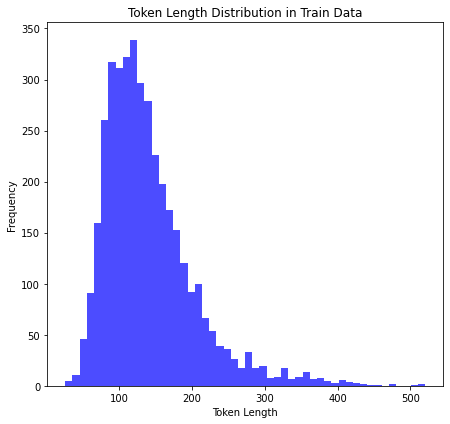

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# 가정: train_data와 test_data는 pandas DataFrame 형태이며, 
# 'conversation'이라는 컬럼에 텍스트 데이터가 포함되어 있다고 가정합니다.

# 토크나이징 함수 정의
def tokenize_and_length(dataframe, tokenizer, column_name='conversation'):
    lengths = []
    for text in dataframe[column_name]:
        tokenized_text = tokenizer(text)
        lengths.append(len(tokenized_text))
    return lengths

# train_data와 test_data의 'conversation' 컬럼 토크나이징 및 길이 계산
train_data['token_length'] = tokenize_and_length(train_data, tok)

# 분포 시각화
plt.figure(figsize=(12, 6))

# train 데이터의 토크나이징 결과 길이 분포
plt.subplot(1, 2, 1)
plt.hist(train_data['token_length'], bins=50, color='blue', alpha=0.7)
plt.title('Token Length Distribution in Train Data')
plt.xlabel('Token Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [92]:
# 길이가 300 이상인 행의 수 계산
over_300 = len(train_data[train_data['token_length'] >= 300])

# 전체 행의 수
total = len(train_data)

# 퍼센티지 계산
percentage = (over_300 / total) * 100

print(f"길이가 300 이상인 행의 비율: {percentage:.2f}%")

길이가 300 이상인 행의 비율: 2.94%


In [96]:
# 파라미터

# parameter 값 출처 : https://github.com/SKTBrain/KoBERT/blob/master/scripts/NSMC/naver_review_classifications_pytorch_kobert.ipynb
max_len = 300 # 97%의 데이터 포인트 길이를 포함하는 범위로 최대 길이 지정
batch_size = 32
warmup_ratio = 0.2
num_epochs = 5
max_grad_norm = 1
log_interval = 300
learning_rate =  5e-5
     

In [182]:
from torch.utils.data import Dataset, DataLoader
import numpy as np
# BERTDataset : 각 데이터가 BERT 모델의 입력으로 들어갈 수 있도록 tokenization, int encoding, padding하는 함수

class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len, pad, pair):
   
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len,vocab = vocab, pad = pad, pair = pair)
        
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))
         

    def __len__(self):
        return (len(self.labels))

data_train = BERTDataset(dataset_train, 0, 1, tok, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, vocab, max_len, True, False)

In [183]:
import torch
# torch 형식의 dataset을 만들어주면서, 입력 데이터셋의 전처리
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size = batch_size, num_workers = 5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size = batch_size, num_workers = 5)

In [184]:
# GPU 사용
device = torch.device("cuda:0") 

In [100]:
from torch import nn
# 모델 구현

# KoBERT 오픈소스 내 예제코드 : https://github.com/SKTBrain/KoBERT/blob/master/scripts/NSMC/naver_review_classifications_pytorch_kobert.ipynb
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 4,   # 라벨 수
                 dr_rate = None,
                 params = None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p = dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict = False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

model = BERTClassifier(bertmodel,  dr_rate = 0.3).to(device)

In [101]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers.optimization import get_cosine_with_hard_restarts_schedule_with_warmup


# optimizer와 schedule 설정
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr = learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 loss function

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_with_hard_restarts_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_step,
    num_training_steps=t_total,
    num_cycles=5
)

In [102]:
# calc_accuracy : 정확도 측정을 위한 함수
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

# 훈련

In [103]:
import os
from tqdm import tqdm, tqdm_notebook

# 모델 저장 경로 설정
model_save_path = 'saved_models'
os.makedirs(model_save_path, exist_ok=True)

# 로스와 정확도 기록을 위한 리스트
train_history = []
test_history = []
train_loss_history = []
test_loss_history = []

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    total_train_loss = 0.0
    total_test_loss = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)

        loss = loss_fn(out, label)
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_loss_history.append(avg_train_loss)
    train_history.append(train_acc / len(train_dataloader))

    model.eval()
    with torch.no_grad():  # 평가 단계에서는 그래디언트 계산을 하지 않음
        for token_ids, valid_length, segment_ids, label in tqdm_notebook(test_dataloader):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)

            loss = loss_fn(out, label)
            total_test_loss += loss.item()
            test_acc += calc_accuracy(out, label)

    avg_test_loss = total_test_loss / len(test_dataloader)
    test_loss_history.append(avg_test_loss)
    test_history.append(test_acc / len(test_dataloader))

    # 모델 저장
    torch.save(model.state_dict(), os.path.join(model_save_path, f'kobert_model_epoch_{e+1}.pt'))
    print(f"Epoch {e+1} Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_acc / len(train_dataloader):.4f}")
    print(f"Epoch {e+1} Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_acc / len(test_dataloader):.4f}")


/tmp/ipykernel_274/361544125.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/98 [00:00<?, ?it/s]

/tmp/ipykernel_274/361544125.py:41: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for token_ids, valid_length, segment_ids, label in tqdm_notebook(test_dataloader):


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1 Train Loss: 1.0953, Train Accuracy: 0.5405
Epoch 1 Test Loss: 0.6664, Test Accuracy: 0.7640


  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 2 Train Loss: 0.4509, Train Accuracy: 0.8487
Epoch 2 Test Loss: 0.4501, Test Accuracy: 0.8483


  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 3 Train Loss: 0.3270, Train Accuracy: 0.8987
Epoch 3 Test Loss: 0.5055, Test Accuracy: 0.8379


  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 4 Train Loss: 0.2183, Train Accuracy: 0.9383
Epoch 4 Test Loss: 0.4394, Test Accuracy: 0.8792


  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 5 Train Loss: 0.1538, Train Accuracy: 0.9611
Epoch 5 Test Loss: 0.4203, Test Accuracy: 0.8797


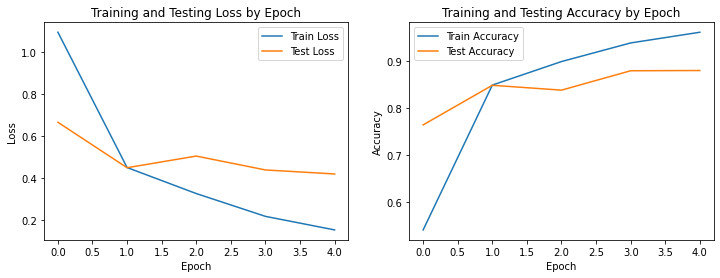

In [105]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss by Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_history, label='Train Accuracy')
plt.plot(test_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy by Epoch')
plt.legend()

plt.show()

# Test

In [106]:
test_data = pd.read_json("~/aiffel/dktc/data/test.json").transpose()
test_data.head()

,text
t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
t_005,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...


In [107]:
# train_data와 test_data의 'conversation' 컬럼 문장 전처리
test_data['conversation'] = test_data['text'].apply(lambda x: preprocess_sentence(x, s_token=False, e_token=False))
test_data.head()

,text,conversation
t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...,우리팀에서 다른팀으로 갈 사람 없나 ? 그럼 영지씨가 가는건 어때 ? 네 ? 제가요...
t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요 . ? 제대로 좀 하지 네 똑바로 좀 하...
t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...,아무튼 앞으로 니가 내 와이파이야 . . 응 와이파이 온 . 켰어 . 반말 ? 주인...
t_005,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...,그러니까 빨리 말해 . 선생님 제발 살려주십시오 . 비밀번호 틀릴 때마다 손톱 하나...


In [108]:
test_data = test_data.drop(columns=['text'])
test_data['file_name'] = test_data.index
test_data = test_data[['file_name'] + [col for col in test_data if col != 'file_name']]
test_data.head()

,file_name,conversation
t_000,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001,t_001,우리팀에서 다른팀으로 갈 사람 없나 ? 그럼 영지씨가 가는건 어때 ? 네 ? 제가요...
t_002,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요 . ? 제대로 좀 하지 네 똑바로 좀 하...
t_004,t_004,아무튼 앞으로 니가 내 와이파이야 . . 응 와이파이 온 . 켰어 . 반말 ? 주인...
t_005,t_005,그러니까 빨리 말해 . 선생님 제발 살려주십시오 . 비밀번호 틀릴 때마다 손톱 하나...


In [109]:
# 테스트 데이터 저장
test_data_original = test_data

In [118]:
# 에포크별로 저장된 모델 불러오기
model.load_state_dict(torch.load('saved_models/kobert_model_epoch_2.pt'))

<All keys matched successfully>

In [128]:
import torch
import numpy as np

# predict 함수: 각 라벨에 대한 점수를 반환
def predict(predict_sentence):
    data = [predict_sentence, '0']
    dataset_another = [data]
    another_test = BERTDataset(dataset_another, 0, 1, tok, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=1, num_workers=5)

    model.eval()

    label_scores = []
    for token_ids, valid_length, segment_ids, label in test_dataloader:
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        out = model(token_ids, valid_length, segment_ids)
        logits = out.detach().cpu().numpy()
        label_scores.append(logits[0])

    return label_scores

int_to_label = {0: '협박 대화', 1: '갈취 대화', 2: '직장 내 괴롭힘 대화', 3: '기타 괴롭힘 대화'}

# 예측 함수를 사용하여 대화 종류 예측
def predict_label(conversation):
    predict_sentence = "[CLS] " + conversation + " [SEP]"
    emotion_scores = predict(predict_sentence)
    predicted_emotion_index = np.argmax(emotion_scores)
    return int_to_label[predicted_emotion_index]


In [129]:
from tqdm import tqdm  # tqdm를 import

# tqdm을 사용하여 진행 상황 시각화
tqdm.pandas()

# df_json에 'class' 컬럼 추가
test_data['class'] = test_data['conversation'].progress_apply(predict_label)

  0%|          | 0/400 [00:00<?, ?it/s]/opt/conda/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 400/400 [03:02<00:00,  2.19it/s]


In [130]:
test_data.head()

,file_name,conversation,class
t_000,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,갈취 대화
t_001,t_001,우리팀에서 다른팀으로 갈 사람 없나 ? 그럼 영지씨가 가는건 어때 ? 네 ? 제가요...,직장 내 괴롭힘 대화
t_002,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요 . ? 제대로 좀 하지 네 똑바로 좀 하...,직장 내 괴롭힘 대화
t_004,t_004,아무튼 앞으로 니가 내 와이파이야 . . 응 와이파이 온 . 켰어 . 반말 ? 주인...,기타 괴롭힘 대화
t_005,t_005,그러니까 빨리 말해 . 선생님 제발 살려주십시오 . 비밀번호 틀릴 때마다 손톱 하나...,협박 대화


In [131]:
# int_to_label 딕셔너리를 사용하여 'class' 컬럼의 문자열을 숫자로 매핑
test_data['class'] = test_data['class'].map({v: k for k, v in int_to_label.items()})
test_data = test_data.drop(columns=['conversation'])
test_data.head()

,file_name,class
t_000,t_000,1
t_001,t_001,2
t_002,t_002,2
t_004,t_004,3
t_005,t_005,0


In [132]:
test_data.to_csv('submission_epoch2.csv', index=False)

## 3번째 에포크 모델로 테스트

In [134]:
test_data =test_data_original

# 에포크별로 저장된 모델 불러오기
model.load_state_dict(torch.load('saved_models/kobert_model_epoch_3.pt'))

# 추론 진행
test_data['class'] = test_data['conversation'].progress_apply(predict_label)

# 결과 확인
test_data.head()

100%|██████████| 400/400 [03:01<00:00,  2.20it/s]


,file_name,conversation,class
t_000,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,갈취 대화
t_001,t_001,우리팀에서 다른팀으로 갈 사람 없나 ? 그럼 영지씨가 가는건 어때 ? 네 ? 제가요...,직장 내 괴롭힘 대화
t_002,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요 . ? 제대로 좀 하지 네 똑바로 좀 하...,직장 내 괴롭힘 대화
t_004,t_004,아무튼 앞으로 니가 내 와이파이야 . . 응 와이파이 온 . 켰어 . 반말 ? 주인...,기타 괴롭힘 대화
t_005,t_005,그러니까 빨리 말해 . 선생님 제발 살려주십시오 . 비밀번호 틀릴 때마다 손톱 하나...,협박 대화


In [135]:
# int_to_label 딕셔너리를 사용하여 'class' 컬럼의 문자열을 숫자로 매핑
test_data['class'] = test_data['class'].map({v: k for k, v in int_to_label.items()})
test_data_epoch3 = test_data.drop(columns=['conversation'])
test_data_epoch3.head()

,file_name,class
t_000,t_000,1
t_001,t_001,2
t_002,t_002,2
t_004,t_004,3
t_005,t_005,0


In [136]:
test_data_epoch3.to_csv('submission_epoch3.csv', index=False)

## 4번째 에포크 모델로 테스트

In [137]:
test_data = test_data_original

# 에포크별로 저장된 모델 불러오기
model.load_state_dict(torch.load('saved_models/kobert_model_epoch_4.pt'))

# 추론 진행
test_data['class'] = test_data['conversation'].progress_apply(predict_label)

# 결과 확인
test_data.head()

  0%|          | 0/400 [00:00<?, ?it/s]/opt/conda/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 400/400 [03:07<00:00,  2.14it/s]


,file_name,conversation,class
t_000,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,갈취 대화
t_001,t_001,우리팀에서 다른팀으로 갈 사람 없나 ? 그럼 영지씨가 가는건 어때 ? 네 ? 제가요...,직장 내 괴롭힘 대화
t_002,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요 . ? 제대로 좀 하지 네 똑바로 좀 하...,직장 내 괴롭힘 대화
t_004,t_004,아무튼 앞으로 니가 내 와이파이야 . . 응 와이파이 온 . 켰어 . 반말 ? 주인...,기타 괴롭힘 대화
t_005,t_005,그러니까 빨리 말해 . 선생님 제발 살려주십시오 . 비밀번호 틀릴 때마다 손톱 하나...,협박 대화


In [138]:
# int_to_label 딕셔너리를 사용하여 'class' 컬럼의 문자열을 숫자로 매핑
test_data['class'] = test_data['class'].map({v: k for k, v in int_to_label.items()})
test_data_epoch4 = test_data.drop(columns=['conversation'])
test_data_epoch4.head()

,file_name,class
t_000,t_000,1
t_001,t_001,2
t_002,t_002,2
t_004,t_004,3
t_005,t_005,0


In [139]:
test_data_epoch4.to_csv('submission_epoch4.csv', index=False)

## 5번째 에포크 모델로 테스트

In [140]:
test_data =test_data_original

# 에포크별로 저장된 모델 불러오기
model.load_state_dict(torch.load('saved_models/kobert_model_epoch_5.pt'))

# 추론 진행
test_data['class'] = test_data['conversation'].progress_apply(predict_label)

# 결과 확인
test_data.head()

  0%|          | 0/400 [00:00<?, ?it/s]/opt/conda/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 400/400 [03:07<00:00,  2.13it/s]


,file_name,conversation,class
t_000,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,갈취 대화
t_001,t_001,우리팀에서 다른팀으로 갈 사람 없나 ? 그럼 영지씨가 가는건 어때 ? 네 ? 제가요...,직장 내 괴롭힘 대화
t_002,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요 . ? 제대로 좀 하지 네 똑바로 좀 하...,직장 내 괴롭힘 대화
t_004,t_004,아무튼 앞으로 니가 내 와이파이야 . . 응 와이파이 온 . 켰어 . 반말 ? 주인...,기타 괴롭힘 대화
t_005,t_005,그러니까 빨리 말해 . 선생님 제발 살려주십시오 . 비밀번호 틀릴 때마다 손톱 하나...,협박 대화


In [141]:
# int_to_label 딕셔너리를 사용하여 'class' 컬럼의 문자열을 숫자로 매핑
test_data['class'] = test_data['class'].map({v: k for k, v in int_to_label.items()})
test_data_epoch5 = test_data.drop(columns=['conversation'])
test_data_epoch5.head()

,file_name,class
t_000,t_000,1
t_001,t_001,2
t_002,t_002,2
t_004,t_004,3
t_005,t_005,0


In [142]:
test_data_epoch5.to_csv('submission_epoch5.csv', index=False)

## 하이퍼 파라미터 변경해서 다시 시도

In [199]:
# 데이터 다시 불러오기
data_list = data_list_original
dataset_train, dataset_test = train_test_split(data_list, test_size = 0.2, shuffle = True, random_state = 32)

In [200]:
print('훈련 데이터 길이:{}, 테스트 데이터 길이:{}'.format(len(dataset_train), len(dataset_test)))

훈련 데이터 길이:3131, 테스트 데이터 길이:783


In [201]:
data_train = BERTDataset(dataset_train, 0, 1, tok, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, vocab, max_len, True, False)

# torch 형식의 dataset을 만들어주면서, 입력 데이터셋의 전처리
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size = batch_size, num_workers = 5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size = batch_size, num_workers = 5)

/opt/conda/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [202]:
import os
import torch
from tqdm import tqdm
from transformers import AdamW
from transformers.optimization import get_cosine_with_hard_restarts_schedule_with_warmup

# 설정 파라미터
max_len = 300
batch_size = 16  # 더 작은 배치 사이즈로 조정
warmup_ratio = 0.1  # 워밍업 비율 감소
num_epochs = 10  # Epochs 수 증가
max_grad_norm = 1
learning_rate = 3e-5  # Learning rate 감소

# 옵티마이저와 스케줄러 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.05},  # Weight decay 증가
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_with_hard_restarts_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_step,
    num_training_steps=t_total,
    num_cycles=5
)

In [203]:
# 모델 초기화
model = BERTClassifier(bertmodel, dr_rate=0.3).to(device)
loss_fn = nn.CrossEntropyLoss()

In [204]:
# 모델 학습 및 평가 함수
def train_or_eval_model(model, dataloader, train=True):
    if train:
        model.train()
    else:
        model.eval()

    total_loss = 0.0
    total_acc = 0.0

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(dataloader)):
        if train:
            optimizer.zero_grad()

        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)

        if train:
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
            optimizer.step()
            scheduler.step()

        total_loss += loss.item()
        total_acc += calc_accuracy(out, label)

    avg_loss = total_loss / len(dataloader)
    avg_acc = total_acc / len(dataloader)
    return avg_loss, avg_acc

In [ ]:
import os
from tqdm import tqdm, tqdm_notebook

# 모델 저장 경로 설정
model_save_path = 'saved_models'
os.makedirs(model_save_path, exist_ok=True)

# 로스와 정확도 기록을 위한 리스트
train_history = []
test_history = []
train_loss_history = []
test_loss_history = []

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    total_train_loss = 0.0
    total_test_loss = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)

        loss = loss_fn(out, label)
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_loss_history.append(avg_train_loss)
    train_history.append(train_acc / len(train_dataloader))

    model.eval()
    with torch.no_grad():  # 평가 단계에서는 그래디언트 계산을 하지 않음
        for token_ids, valid_length, segment_ids, label in tqdm_notebook(test_dataloader):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)

            loss = loss_fn(out, label)
            total_test_loss += loss.item()
            test_acc += calc_accuracy(out, label)

    avg_test_loss = total_test_loss / len(test_dataloader)
    test_loss_history.append(avg_test_loss)
    test_history.append(test_acc / len(test_dataloader))

    # 모델 저장
    torch.save(model.state_dict(), os.path.join(model_save_path, f'kobert_model_modified_epoch_{e+1}.pt'))
    print(f"Epoch {e+1} Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_acc / len(train_dataloader):.4f}")
    print(f"Epoch {e+1} Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_acc / len(test_dataloader):.4f}")


/tmp/ipykernel_274/792192515.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/196 [00:00<?, ?it/s]

/tmp/ipykernel_274/792192515.py:41: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for token_ids, valid_length, segment_ids, label in tqdm_notebook(test_dataloader):


  0%|          | 0/49 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss by Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_history, label='Train Accuracy')
plt.plot(test_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy by Epoch')
plt.legend()

plt.show()

## 새로운 테스트

In [ ]:
test_data = test_data_original
epoch = 4

# 에포크별로 저장된 모델 불러오기
model.load_state_dict(torch.load(f'saved_models/kobert_model_modified_epoch_{epoch}.pt'))

# 추론 진행
test_data['class'] = test_data['conversation'].progress_apply(predict_label)

# int_to_label 딕셔너리를 사용하여 'class' 컬럼의 문자열을 숫자로 매핑
test_data['class'] = test_data['class'].map({v: k for k, v in int_to_label.items()})
test_data_modi_epoch4 = test_data.drop(columns=['conversation'])
test_data_epoch4.to_csv(f'submission_modified_epoch{epoch}.csv', index=False)